### Student Information
Name: 呂尚霖

Student ID: 110062625

GitHub ID: ShLL625

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


In [2]:
# import necessary functions and tools for take home exercise (create X)

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
#Answer here
X.query('category == 1')

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
11    From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
...                                                 ...       ...   
2232  From: lipman@oasys.dt.navy.mil (Robert Lipman)...         1   
2236  From: dkusswur@falcon.depaul.edu (Daniel C. Ku...         1   
2241  From: dls@aeg.dsto.gov.au (David Silver) Subje...         1   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   

      category_name  
0     comp.graphics  
1     comp.graphics  
11    comp.graphics  
14    comp.graphics  
15    comp.graphics  
...             ...  
2232  comp.graphics  
2236  comp.graphics  
2241  comp.graphics  
2242  comp.graphics  
2248  comp.graphics  

[584 rows x 3 columns]

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [6]:
#Answer here

In A, there's a "np.nan" in its 'missing_example' label, which is a default none type data by numpy(), so there's a missing data for isnull().

In B, there's nothing in its 'missing_example' label, so there's a missing data for isnull().

In C, there's a " 'Nan' " in its 'missing_example' label, which is a text type data contained a word "Nan", so there's no missing data for isnull().

In D, there's a " 'None' " in its 'missing_example' label, which is a text type data contained a word "None", so there's no missing data for isnull().

In E, there's a "None" in its 'missing_example' label, which is a default none type data by python3, so there's a missing data for isnull().

In F, there's a " ' ' " in its 'missing_example' label, which is a text type data contained nothing, so there's no missing data for isnull().

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [7]:
# Answer here

No, I don't think there's any changing in X.

Sampling from X sould not change the original data in X

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

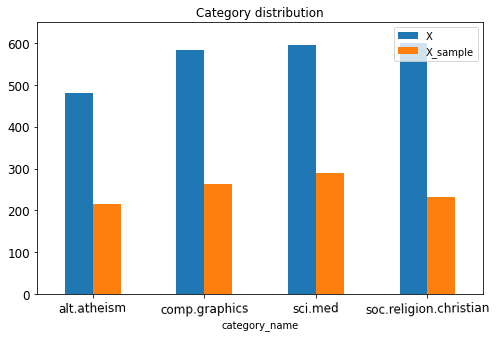

In [9]:
# Answer here
X_sample = X.sample(n=1000) #random state
#concat the original data and sample data for ploting
Y_original=X.copy()
Y_original['data_source']='X'
Y_sample=X_sample.copy()
Y_sample['data_source']='X_sample'
Y=pd.concat([Y_original, Y_sample])
#apply groupby to plot X and X_sample
upper_bound=max(X.category_name.value_counts())+50
Y.groupby(['category_name']).data_source.value_counts().unstack().plot(kind = 'bar',
                                                                       title = 'Category distribution',
                                                                       ylim = [0, upper_bound], 
                                                                       rot = 1, fontsize = 12, figsize = (8,5))
plt.legend(loc = "upper right")

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [11]:
# Answer here
#print the corresponding vocabulary if its count is 1
for t in range(100):
    if X_counts[4:5, 0:100].toarray()[0,t]==1:
        print(count_vect.get_feature_names_out()[t])

00
01


This code verifies every 1 in for-loop's range to the vocabulary it represented. Another 1 is the second 1 in range, so it represent 01

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


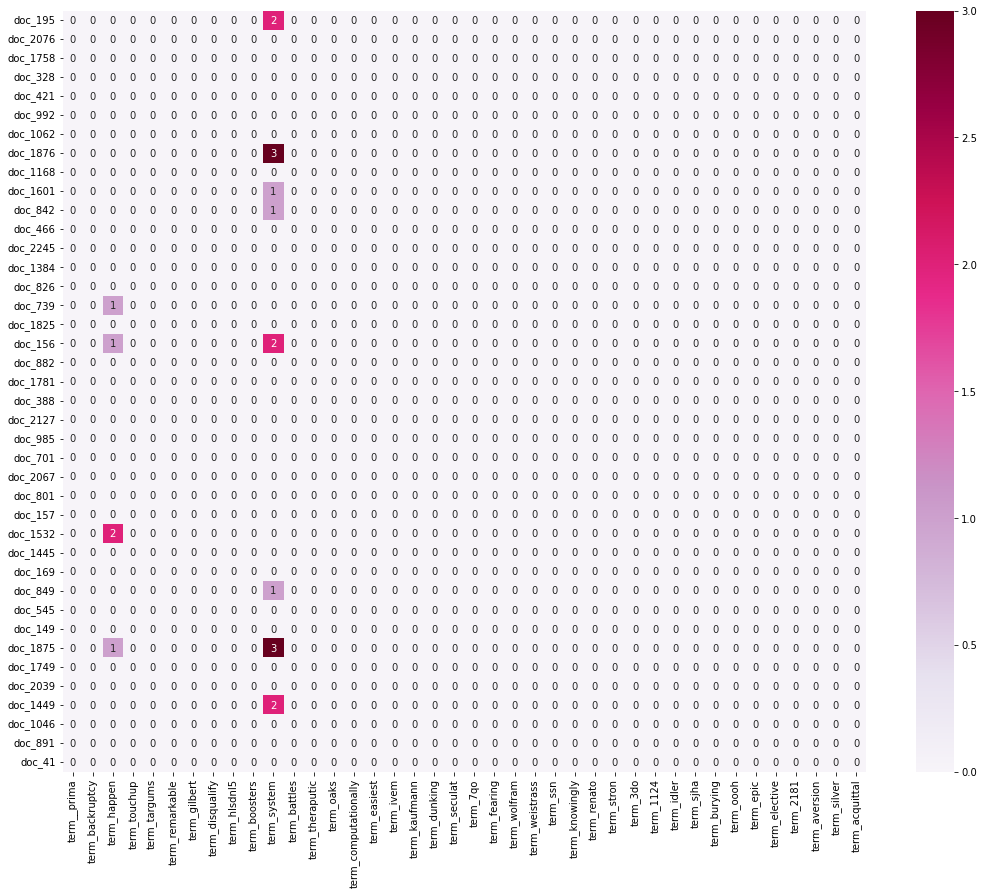

In [12]:
# Answer here
#use np.random.choice to sample the dataframe
x_random = np.random.choice(X_counts.toarray().shape[1], 40, replace=False)
plot_x_random = ["term_"+str(count_vect.get_feature_names()[i]) for i in x_random]
y_random = np.random.choice(X_counts.toarray().shape[0], 40, replace=False)
plot_y_random = ["doc_"+ str(list(X.index)[i]) for i in y_random]
z_random = X_counts.toarray()
plot_z_random=np.empty([40, 40])
k=0
l=0
for i in y_random:
    for j in x_random:
        plot_z_random[k, l] = z_random[i, j]
        l=l+1
    k=k+1
    l=0
v_max_random = np.amax(plot_z_random)
#plot the term-document matrix
import seaborn as sns
df_todraw_random = pd.DataFrame(plot_z_random, columns = plot_x_random, index = plot_y_random)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw_random,
                 cmap="PuRd",
                 vmin=0, vmax=v_max_random, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [13]:
from sklearn.decomposition import PCA

In [14]:
# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# plot 3D
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure(figsize = (25,10))
fig2 = plt.figure(figsize = (25,10))
fig3 = plt.figure(figsize = (25,10))
ax1 = Axes3D(fig1)
ax2 = Axes3D(fig2)
ax3 = Axes3D(fig3)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')
#set camera angle
ax2.view_init(azim=0)
ax3.view_init(azim=90)
plt.show()
###**********I had a memory issue to allocate the array, but it worked on the smaller array I tried, so it should be fine to 
###          run on a capable computer. **********

MemoryError: Unable to allocate 616. MiB for an array with shape (2257, 35788) and data type int64

## *I had a memory issue to allocate the array, but it worked on the smaller array I tried, so it should be fine to run on a capable computer. *           

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [15]:
#calculate frequency
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [16]:
# Answer here
#plot by plotly
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
fig.show()

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [17]:
# Answer here
#calculate the mean frequency of all unigrams, and set the gate deppending on it
mean = np.mean(term_frequencies)
gate = mean*10
#filt the unigrams whose freguency is lower then gate 
n=0
for i in range(0,term_frequencies.shape[0]):
    if term_frequencies[i] > gate:
        n=n+1
x_adjust = []
y_adjust = np.empty(shape=n)
z = count_vect.get_feature_names()
n=0
for i in range(0,term_frequencies.shape[0]):
    if term_frequencies[i] > gate:
        x_adjust.append(z[i])
        y_adjust[n] = term_frequencies[i]
        n=n+1
print(n,gate)
#plot the result with plotly
import plotly.express as px
fig = px.bar(x=x_adjust, y=y_adjust)
fig.show()

419 193.10355426399911


c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [18]:
# Answer here
#sort the array by its frequency
x_adjust = np.array(x_adjust)
x_adjust_sort = x_adjust[y_adjust.argsort()]
y_adjust_sort = y_adjust[y_adjust.argsort()]
#plot the result with plotly
import plotly.express as px
fig = px.bar(x=x_adjust_sort[::-1], y=y_adjust_sort[::-1])
fig.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [19]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [20]:
# Answer here
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category  
0           comp.graphics  [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]

Yes, it works.

2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

In [21]:
#import dataset from amazon_cells_labelled.txt, imdb_labelled.txt, yelp_labelled.txt, and setup dataframe X_new
import helpers.data_mining_helpers_newdataset as dmhn
#import dataset from amazon_cells_labelled.txt, then format it to dataframe
file = open('sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt','r',encoding="utf-8")
df_new = file.read()
file.close()
X_format = dmhn.format_rows(df_new)
dic={'sentence':X_format[0],
     'score':X_format[1]}
X_amazon = pd.DataFrame(dic)
#add a new column to record the data source
X_amazon['dataset'] = 'amazon_cells'
#import dataset from imdb_labelled.txt, then format it to dataframe
file = open('sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt','r',encoding="utf-8")
df_new = file.read()
file.close()
X_format = dmhn.format_rows(df_new)
dic={'sentence':X_format[0],
     'score':X_format[1]}
X_imdb = pd.DataFrame(dic)
#add a new column to record the data source
X_imdb['dataset'] = 'imdb'
#import dataset from yelp_labelled.txt, then format it to dataframe
file = open('sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt','r',encoding="utf-8")
df_new = file.read()
file.close()
X_format = dmhn.format_rows(df_new)
dic={'sentence':X_format[0],
     'score':X_format[1]}
X_yelp = pd.DataFrame(dic)
#add a new column to record the data source
X_yelp['dataset'] = 'yelp'
#concat three dataframe, which are from different data source into one dataframe X_new
X_new = X_amazon.append(X_imdb, ignore_index=True).append(X_yelp, ignore_index=True)
X_new

sentence score       dataset
0     So there is no way for me to plug it in here i...     0  amazon_cells
1                           Good case, Excellent value.     1  amazon_cells
2                                Great for the jawbone.     1  amazon_cells
3     Tied to charger for conversations lasting more...     0  amazon_cells
4                                     The mic is great.     1  amazon_cells
...                                                 ...   ...           ...
2995  I think food should have flavor and texture an...     0          yelp
2996                           Appetite instantly gone.     0          yelp
2997  Overall I was not impressed and would not go b...     0          yelp
2998  The whole experience was underwhelming, and I ...     0          yelp
2999  Then, as if I hadn't wasted enough of my life ...     0          yelp

[3000 rows x 3 columns]

In [22]:
#Check for missing values and Duplicate datas
X_new.isnull().apply(lambda x: dmhn.check_missing_values(x))
print('Duplicate data detect: ',sum(X_new.duplicated()))
#droping the duplicate datas
X_new.drop_duplicates(keep=False, inplace=True, ignore_index=True)
print('duplicate data detect after droping:', sum(X_new.duplicated()))
X_new

Duplicate data detect:  17
duplicate data detect after droping: 0


sentence score       dataset
0     So there is no way for me to plug it in here i...     0  amazon_cells
1                           Good case, Excellent value.     1  amazon_cells
2                                Great for the jawbone.     1  amazon_cells
3     Tied to charger for conversations lasting more...     0  amazon_cells
4                                     The mic is great.     1  amazon_cells
...                                                 ...   ...           ...
2961  I think food should have flavor and texture an...     0          yelp
2962                           Appetite instantly gone.     0          yelp
2963  Overall I was not impressed and would not go b...     0          yelp
2964  The whole experience was underwhelming, and I ...     0          yelp
2965  Then, as if I hadn't wasted enough of my life ...     0          yelp

[2966 rows x 3 columns]

0    1486
1    1480
Name: score, dtype: int64


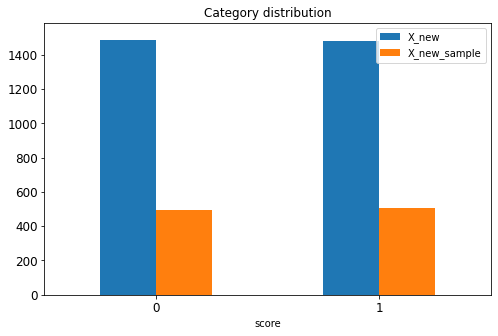

In [23]:
#sample then plot the result
import matplotlib.pyplot as plt
%matplotlib inline
print(X_new.score.value_counts())
upper_bound=max(X_new.score.value_counts())+100
X_new_sample = X_new.sample(n=1000)
Y_new_original=X_new.copy()
Y_new_original['data_source']='X_new'
Y_new_sample=X_new_sample.copy()
Y_new_sample['data_source']='X_new_sample'
Y=pd.concat([Y_new_original, Y_new_sample])
Y.groupby(['score']).data_source.value_counts().unstack().plot(kind = 'bar',
                                                               title = 'Category distribution',
                                                               ylim = [0, upper_bound], 
                                                               rot = 1, fontsize = 12, figsize = (8,5))
plt.legend(loc = "upper right")

In [24]:
#feature creation by obtaining the unigrams with tokenized text
import nltk
X_new['unigrams'] = X_new['sentence'].apply(lambda x: dmhn.tokenize_text(x))
X_new['unigrams']

0       [So, there, is, no, way, for, me, to, plug, it...
1                    [Good, case, ,, Excellent, value, .]
2                           [Great, for, the, jawbone, .]
3       [Tied, to, charger, for, conversations, lastin...
4                                [The, mic, is, great, .]
                              ...                        
2961    [I, think, food, should, have, flavor, and, te...
2962                       [Appetite, instantly, gone, .]
2963    [Overall, I, was, not, impressed, and, would, ...
2964    [The, whole, experience, was, underwhelming, ,...
2965    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: unigrams, Length: 2966, dtype: object

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



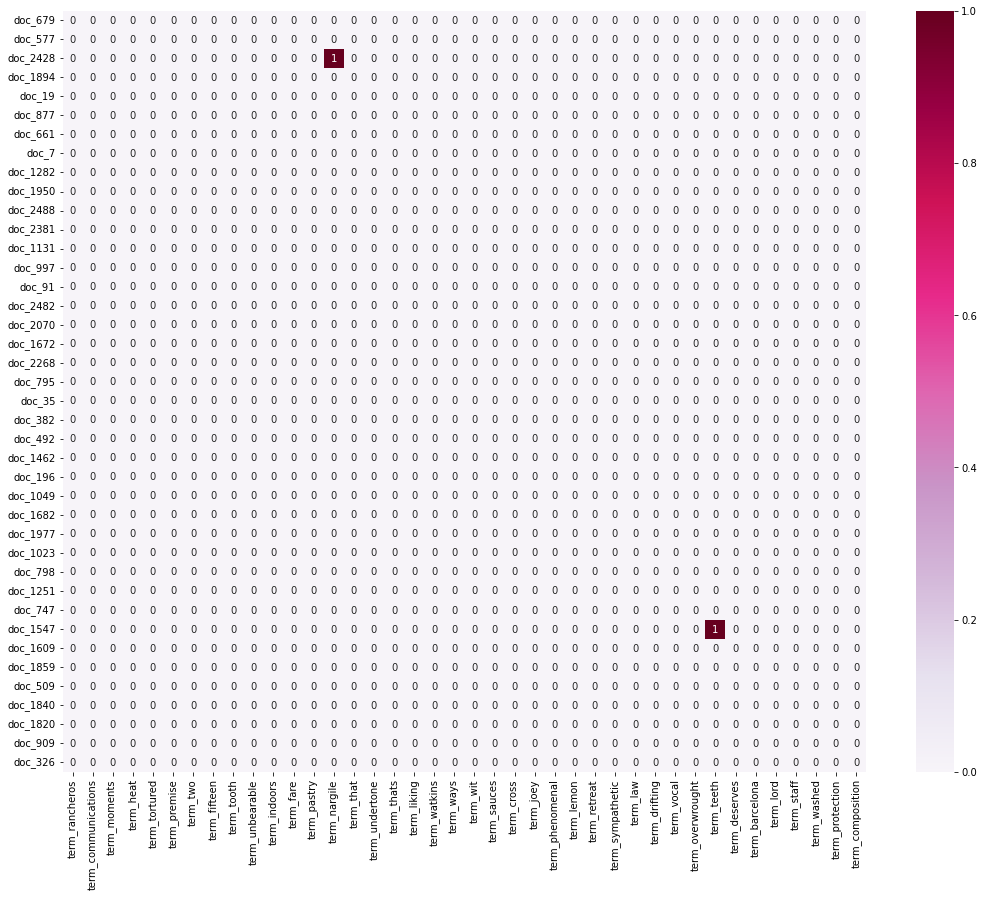

In [25]:
#construct the term-document matrix of the dataframe with sampled data by np.random.choice
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
#Vectorize the words in the dataframe
count_vect = CountVectorizer()
X_new_counts = count_vect.fit_transform(X_new.sentence)
#use np.random.choice to sample the dataframe
x_random = np.random.choice(X_new_counts.toarray().shape[1], 40, replace=False)
plot_x_random = ["term_"+str(count_vect.get_feature_names()[i]) for i in x_random]
y_random = np.random.choice(X_new_counts.toarray().shape[0], 40, replace=False)
plot_y_random = ["doc_"+ str(list(X_new.index)[i]) for i in y_random]
z_random = X_new_counts.toarray()
plot_z_random=np.empty([40, 40])
k=0
l=0
for i in y_random:
    for j in x_random:
        plot_z_random[k, l] = z_random[i, j]
        l=l+1
    k=k+1
    l=0
v_max_random = np.amax(plot_z_random)
#plot the term-document matrix
import seaborn as sns
df_todraw_random = pd.DataFrame(plot_z_random, columns = plot_x_random, index = plot_y_random)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw_random,
                 cmap="PuRd",
                 vmin=0, 
                 vmax=v_max_random, 
                 annot=True)

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\ipykerne

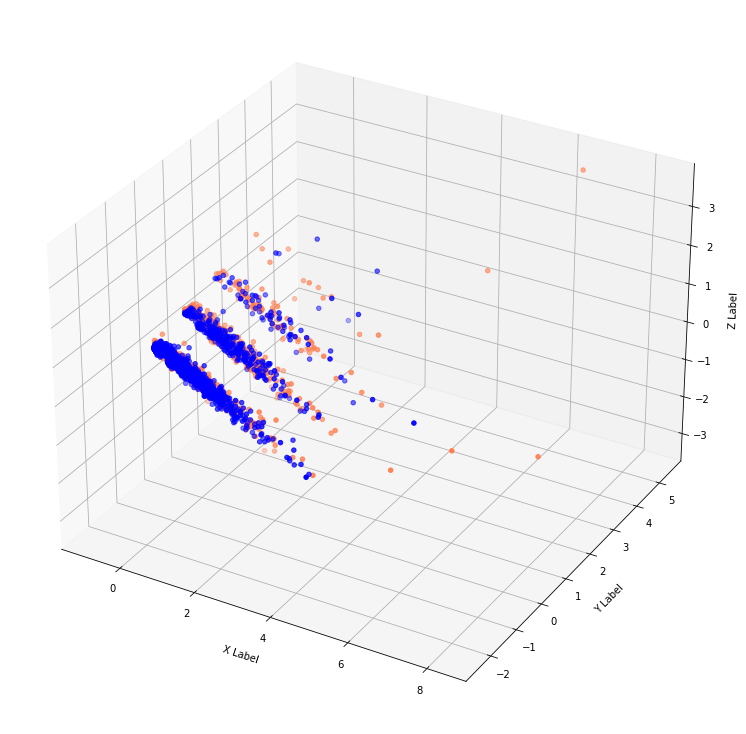

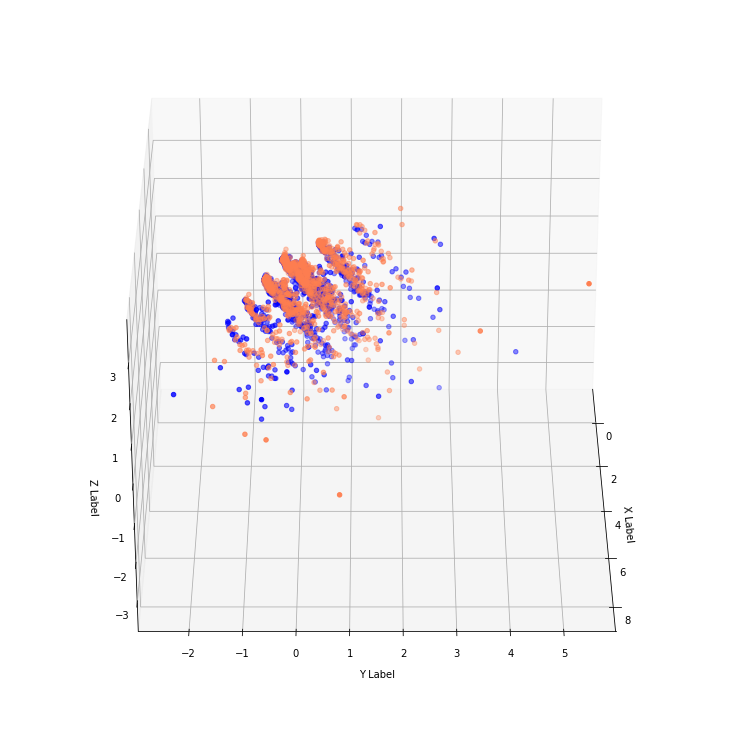

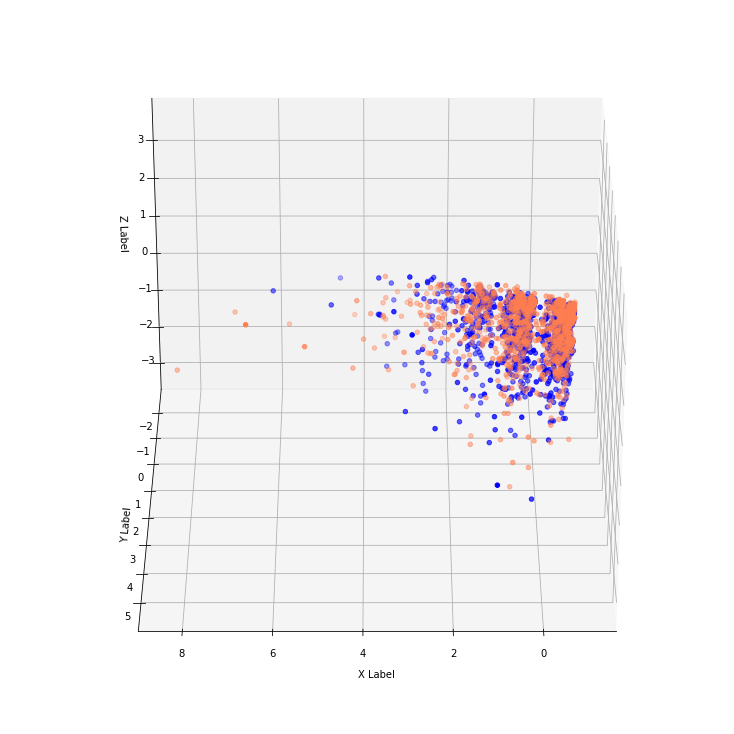

In [26]:
#Reduce the dimension to 3 and plot it depend on its score from 3 different angle
from sklearn.decomposition import PCA
X_new_reduced = PCA(n_components = 3).fit_transform(X_new_counts.toarray())
scores = ['1', '0']
col = ['coral', 'blue']

# plot
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure(figsize = (25,10))
fig2 = plt.figure(figsize = (25,10))
fig3 = plt.figure(figsize = (25,10))
ax1 = Axes3D(fig1)
ax2 = Axes3D(fig2)
ax3 = Axes3D(fig3)

for c, score in zip(col, scores):
    xs = X_new_reduced[X_new['score'] == score].T[0]
    ys = X_new_reduced[X_new['score'] == score].T[1]
    zs = X_new_reduced[X_new['score'] == score].T[2]
   
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')

ax2.view_init(azim=0)
ax3.view_init(azim=90)
plt.show()

In [27]:
#calculate the frequency of each unigram
term_frequencies = []
for j in range(0,X_new_counts.shape[1]):
    term_frequencies.append(sum(X_new_counts[:,j].toarray()))
term_frequencies = np.asarray(X_new_counts.sum(axis=0))[0]
#calculate the mean frequency of all unigrams, and set the gate deppending on it
mean = np.mean(term_frequencies)
gate = mean*10
#filt the unigrams whose freguency is lower then gate 
n=0
for i in range(0,term_frequencies.shape[0]):
    if term_frequencies[i] > gate:
        n=n+1
x_adjust = []
y_adjust = np.empty(shape=n)
z = count_vect.get_feature_names()
n=0
for i in range(0,term_frequencies.shape[0]):
    if term_frequencies[i] > gate:
        x_adjust.append(z[i])
        y_adjust[n] = term_frequencies[i]
        n=n+1
print(n,gate)
#sort the array by its frequency
x_adjust = np.array(x_adjust)
x_adjust_sort = x_adjust[y_adjust.argsort()]
y_adjust_sort = y_adjust[y_adjust.argsort()]
#plot the result with plotly
import plotly.express as px
fig = px.bar(x=x_adjust_sort[::-1], y=y_adjust_sort[::-1])
fig.show()

72 65.14263535804386


c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [28]:
#Binarize by dataset
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X_new.dataset)
X_new['bin_dataset'] = mlb.transform(X_new['dataset']).tolist()
X_new

sentence score       dataset  \
0     So there is no way for me to plug it in here i...     0  amazon_cells   
1                           Good case, Excellent value.     1  amazon_cells   
2                                Great for the jawbone.     1  amazon_cells   
3     Tied to charger for conversations lasting more...     0  amazon_cells   
4                                     The mic is great.     1  amazon_cells   
...                                                 ...   ...           ...   
2961  I think food should have flavor and texture an...     0          yelp   
2962                           Appetite instantly gone.     0          yelp   
2963  Overall I was not impressed and would not go b...     0          yelp   
2964  The whole experience was underwhelming, and I ...     0          yelp   
2965  Then, as if I hadn't wasted enough of my life ...     0          yelp   

                                               unigrams bin_dataset  
0     [So, there, is, no, way, for, me, to, plug, it...   [1, 0, 0]  
1                  [Good, case, ,, Excellent, value, .]   [1, 0, 0]  
2                         [Great, for, the, jawbone, .]   [1, 0, 0]  
3     [Tied, to, charger, for, conversations, lastin...   [1, 0, 0]  
4                              [The, mic, is, great, .]   [1, 0, 0]  
...                                                 ...         ...  
2961  [I, think, food, should, have, flavor, and, te...   [0, 0, 1]  
2962                     [Appetite, instantly, gone, .]   [0, 0, 1]  
2963  [Overall, I, was, not, impressed, and, would, ...   [0, 0, 1]  
2964  [The, whole, experience, was, underwhelming, ,...   [0, 0, 1]  
2965  [Then, ,, as, if, I, had, n't, wasted, enough,...   [0, 0, 1]  

[2966 rows x 5 columns]

In [29]:
#Data exploration
#make 3 documents which contains all sentence depended on their dataset: amazon_cells, imdb, yelp
document_to_transform_amazon = []
document_to_transform_imdb = []
document_to_transform_yelp = []
text_amazon = ''
text_imdb = ''
text_yelp = ''
for i in range(len(X_new)):
    if X_new.dataset[i] == 'amazon_cells':
        text_amazon = text_amazon+' '+''.join(X_new.sentence[i][0:len(X_new.sentence[i])])
    elif X_new.dataset[i] == 'imdb':
        text_imdb = text_imdb+' '+''.join(X_new.sentence[i][0:len(X_new.sentence[i])])
    else:
        text_yelp = text_yelp+' '+''.join(X_new.sentence[i][0:len(X_new.sentence[i])])
document_to_transform_amazon.append(text_amazon)
document_to_transform_imdb.append(text_imdb)
document_to_transform_yelp.append(text_yelp)
              
from sklearn.preprocessing import binarize
# Transform sentence with Vectorizers
document_vector_count_amazon = count_vect.transform(document_to_transform_amazon)
document_vector_count_imdb = count_vect.transform(document_to_transform_imdb)
document_vector_count_yelp = count_vect.transform(document_to_transform_yelp)
# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_amazon_bin = binarize(document_vector_count_amazon)
document_vector_count_imdb_bin = binarize(document_vector_count_imdb)
document_vector_count_yelp_bin = binarize(document_vector_count_yelp)

from sklearn.metrics.pairwise import cosine_similarity
# Calculate Cosine Similarity
cos_sim_count_amazon_imdb = cosine_similarity(document_vector_count_amazon, document_vector_count_imdb, dense_output=True)
cos_sim_count_amazon_yelp = cosine_similarity(document_vector_count_amazon, document_vector_count_yelp, dense_output=True)
cos_sim_count_imdb_yelp = cosine_similarity(document_vector_count_imdb, document_vector_count_yelp, dense_output=True)
# Print 
print("Cosine Similarity using count bw amazon and imdb: %(x)f" %{"x":cos_sim_count_amazon_imdb})
print("Cosine Similarity using count bw amazon and yelp: %(x)f" %{"x":cos_sim_count_amazon_yelp})
print("Cosine Similarity using count bw imdb and yelp: %(x)f" %{"x":cos_sim_count_imdb_yelp})

Cosine Similarity using count bw amazon and imdb: 0.892412
Cosine Similarity using count bw amazon and yelp: 0.872629
Cosine Similarity using count bw imdb and yelp: 0.885470


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

In [30]:
#add a new column 'contained_mark' to category sentence to '?', '!', 'none', 'both' according to whether it contained these mark 
contained_mark=[]
for i in range(len(X_new)):
    question_mark=0
    exclamation_mark=0
    for j in X_new.sentence[i]:
        if j == '?' : question_mark=1
        elif j == '!': exclamation_mark=1
    #print(question_mark,exclamation_mark)
    if question_mark & exclamation_mark:
        contained_mark.append('both')
    elif question_mark:
        contained_mark.append('?')
    elif exclamation_mark:
        contained_mark.append('!')
    else:
        contained_mark.append('none')
X_new['contained_mark']=contained_mark
#calculate the frequency of contained_mark in different dataset 
r_amazon = [0, 0, 0, 0]
r_imdb = [0, 0, 0, 0]
r_yelp = [0, 0, 0, 0]
theta = ['both', '?', '!', 'none']
for i in range(len(X_new)):
    if X_new.dataset[i] == 'amazon_cells':
        if X_new.contained_mark[i] == 'both':
            r_amazon[0] = r_amazon[0] + 1
        elif X_new.contained_mark[i] == '?':
            r_amazon[1] = r_amazon[1] + 1
        elif X_new.contained_mark[i] == '!':
            r_amazon[2] = r_amazon[2] + 1
        else:
            r_amazon[3] = r_amazon[3] + 1
    elif X_new.dataset[i] == 'imdb':
        if X_new.contained_mark[i] == 'both':
            r_imdb[0] = r_imdb[0] + 1
        elif X_new.contained_mark[i] == '?':
            r_imdb[1] = r_imdb[1] + 1
        elif X_new.contained_mark[i] == '!':
            r_imdb[2] = r_imdb[2] + 1
        else:
            r_imdb[3] = r_imdb[3] + 1
    else:
        if X_new.contained_mark[i] == 'both':
            r_yelp[0] = r_yelp[0] + 1
        elif X_new.contained_mark[i] == '?':
            r_yelp[1] = r_yelp[1] + 1
        elif X_new.contained_mark[i] == '!':
            r_yelp[2] = r_yelp[2] + 1
        else:
            r_yelp[3] = r_yelp[3] + 1
#star plot 3 different dataset
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=r_amazon,
      theta=theta,
      fill='toself',
      name='amazon'
))
fig.add_trace(go.Scatterpolar(
      r=r_imdb,
      theta=theta,
      fill='toself',
      name='imdb'
))
fig.add_trace(go.Scatterpolar(
      r=r_yelp,
      theta=theta,
      fill='toself',
      name='yelp'
))
fig.show()

In [31]:
#TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
#TF-IDF
vectorizer = TfidfVectorizer()
X_new_TF_IDF = vectorizer.fit_transform(X_new.sentence)
#vectorizer.get_feature_names_out()
X_new_TF_IDF

<2966x5153 sparse matrix of type '<class 'numpy.float64'>'
	with 31452 stored elements in Compressed Sparse Row format>

In [32]:
#word frequency
count_vect = CountVectorizer()
X_new_word_frequency = count_vect.fit_transform(X_new.sentence)
X_new_word_frequency
#Multinomial naive Bayes
from sklearn.naive_bayes import MultinomialNB
#TF-IDF 
mnb_TF_IDF = MultinomialNB()
mnb_TF_IDF.fit(X_new_TF_IDF, np.array(X_new.score))
mnb_TF_IDF.predict(X_new_TF_IDF) #test
#word frequency 
mnb_word_frequency = MultinomialNB()
mnb_word_frequency.fit(X_new_word_frequency, np.array(X_new.score))
mnb_word_frequency.predict(X_new_word_frequency) #test


array(['0', '1', '1', ..., '0', '0', '0'], dtype='<U1')

TF-IDF is the abbreviation of "Term frequency-Inverse document frequency", so word frequency feature have only the "Term frequency" part of TF-IDF.
Inverse document frequency facror is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.
Means that word frequency feature might give some words, which keeps appearing but meaningless, high weight, and results in the neglection of meaningfull words.
By comparison, TF-IDF will filt those words to make sure those meaningfull words have high enough wieght.

4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


In [33]:
# Answer here

The datas are emails which contain: From, Subject, Organization, Lines and contents in the 'text' columns of the dataframe.
Perhaps we are only interest in thier contents part, or we can store the others information (From, Subject, Organization, Lines) in others columns as attributes.